## STEP 1 : Download Dataset and Prepare Programming

In [23]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

## STEP 2 : Select Methods

Clustering : Kmeans <br>
Classification : Random Forest

## STEP 3 : Import Dataset

In [32]:
od=pd.read_csv('./data/data.csv', sep=',')
# print(od.values)

In [33]:
#last column contain only nan value due to extra delimeter end of line
od = od.drop(od.columns[[0,32]],axis=1)
od['diagnonis'] = od['diagnosis'].map({'M':0,'B':1})
print(od.shape)
print(od.columns)
print(od.info())

(569, 32)
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnonis'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture

## STEP 4 : Normalize the Dataset

In [19]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns[2:]:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [20]:
nd = normalize(od)
print(nd[:5])

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99      0.022658        0.545989   0.363733   
1         M        20.57      0.272574        0.615783   0.501591   
2         M        19.69      0.390260        0.595743   0.449417   
3         M        11.42      0.360839        0.233501   0.102906   
4         M        20.29      0.156578        0.630986   0.489290   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   symmetry_mean  ...  symmetry_se  fractal_dimension_se  radius_worst  \
0       0.686364  ...     0.311645              

## STEP 5 : Cluster the Original Dataset

In [35]:
# Featureset creation
X = od.drop('diagnosis', axis=1).values
X = preprocessing.StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'KMeans clustering plot')

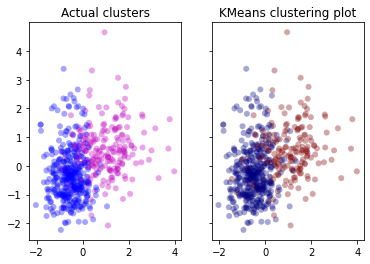

In [40]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
km_pred = km.fit_predict(X)
#labels = km.labels_

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=od["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans clustering plot")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.002s...
[t-SNE] Computed neighbors for 569 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.547354
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.857002
[t-SNE] KL divergence after 1600 iterations: 0.806738


Text(0.5, 1.0, 'Actual clusters')

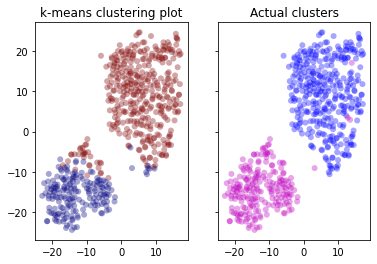

In [43]:
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
kY = kmns.fit_predict(X)

from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = od['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

## STEP 6 : Cluster the Normalized Dataset

## STEP 7 : Present Clustered Dataset

## STEP 8 : Split the Normalized and Original Dataset

In [21]:
# Original Dataset
msk = np.random.rand(len(od)) < 0.8
train_od = od[msk]
test_od = od[~msk]
test_od[:5]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320
13,M,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,0.02981,0.003002,16.84,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190
18,M,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,...,0.01356,0.001997,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.53720,0.23880
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,0.01980,0.002300,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,...,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227


In [22]:
# Normalized Dataset
msk = np.random.rand(len(nd)) < 0.8
train_nd = nd[msk]
test_nd = nd[~msk]
test_nd[:5]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst
4,M,20.29,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419
5,M,12.45,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,...,0.193730,0.144660,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282
6,M,18.25,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,...,0.081725,0.044367,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918
13,M,15.85,0.481569,0.414000,0.271135,0.283290,0.247899,0.232849,0.266600,0.397475,...,0.308550,0.072800,0.316969,0.416844,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536
17,M,16.13,0.370984,0.444406,0.277964,0.581114,0.560763,0.403468,0.510934,0.557576,...,0.126752,0.112184,0.463536,0.518657,0.430251,0.277674,0.711418,0.384211,0.382109,0.712371


## STEP 9 : Classify the Test with you trained model

## STEP 10 : Use Scatter Plots to show Relations between  features cluster/classes

## STEP 11 : Present the Classification Results for each Normalized and Original Dataset